## Layers

In [ ]:
# import packages
import sys
import os
from dotenv import load_dotenv
from IPython.display import display, HTML
import json
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from datetime import datetime


# Load environment variables from .env file
load_dotenv()

# import the API builder
sys.path.append(os.path.abspath(".."))
from API_ScoutMaster_V2 import ScoutMasterAPI

In [118]:
# Scoutmaster API - Credentials
client_id = os.getenv('SM_CLIENT_ID')
client_secret = os.getenv('SM_CLIENT_SECRET')
project_id = os.getenv('SM_PROJECT_ID')

# Scoutmaster API - Init
SM_API = ScoutMasterAPI()
SM_API.authenticate(client_id=client_id, client_secret=client_secret)

✅ Successfully authenticated ScoutMaster API


In [ ]:
output_folder = "../data/output/"
layer_type_id = ""
field_id = ""

In [120]:
SM_API.output_format = 'df'
# layer types
df_layer_types = SM_API.layers_types(project_id=project_id)
layer_type = df_layer_types[df_layer_types["id"] == layer_type_id]
if layer_type.empty:
    raise ValueError(f"❌ Layer type '{layer_type_id}' does not exist in df_layer_types")
print(f"✅ Found layer_type: {layer_type.iloc[0]['name']} ({layer_type.iloc[0]['abbreviation']})")


✅ Found layer_type: Scouting (SCOUT)


In [124]:
df_layers = SM_API.layers(field_id, layer_type_id)
df_layers["updated_at"] = pd.to_datetime(df_layers["updated_at"], utc=True, errors="coerce")

# Define 'today' in UTC
today = pd.Timestamp(datetime.now().date()).tz_localize("UTC")

# Filter rows where updated_at is today or later
df_layers_today = df_layers[df_layers["updated_at"] >= today]
df_layers_today

,id,layer_stack_id,created_at,layer_crs,updated_at,path,acquired_at,layer_timestamp,layer_type,layer_statistics
0,103900,45374,2025-09-12T23:23:16.427Z,None,2025-09-16 11:00:19.414000+00:00,https://soildata-terrasphere.s3.eu-central-1.a...,2025-05-12T08:33:55.000Z,2025-05-12T08:33:55.000Z,"{'id': '0a0e0317-8dad-4118-8150-f7a29732cd65',...",None
1,103897,45371,2025-09-12T23:23:16.393Z,None,2025-09-16 11:00:20.678000+00:00,https://soildata-terrasphere.s3.eu-central-1.a...,2025-05-15T09:02:38.000Z,2025-05-15T09:02:38.000Z,"{'id': '0a0e0317-8dad-4118-8150-f7a29732cd65',...",None
2,103904,45378,2025-09-12T23:23:16.442Z,None,2025-09-16 11:00:20.717000+00:00,https://soildata-terrasphere.s3.eu-central-1.a...,2025-05-17T09:05:22.000Z,2025-05-17T09:05:22.000Z,"{'id': '0a0e0317-8dad-4118-8150-f7a29732cd65',...",None
3,103902,45375,2025-09-12T23:23:16.439Z,None,2025-09-16 11:00:19.920000+00:00,https://soildata-terrasphere.s3.eu-central-1.a...,2025-05-20T08:57:22.000Z,2025-05-20T08:57:22.000Z,"{'id': '0a0e0317-8dad-4118-8150-f7a29732cd65',...",None
4,103899,45373,2025-09-12T23:23:16.413Z,None,2025-09-16 11:00:20.347000+00:00,https://soildata-terrasphere.s3.eu-central-1.a...,2025-06-06T09:01:55.000Z,2025-06-06T09:01:55.000Z,"{'id': '0a0e0317-8dad-4118-8150-f7a29732cd65',...",None
5,103898,45372,2025-09-12T23:23:16.394Z,None,2025-09-16 11:00:18.943000+00:00,https://soildata-terrasphere.s3.eu-central-1.a...,2025-06-15T09:08:33.000Z,2025-06-15T09:08:33.000Z,"{'id': '0a0e0317-8dad-4118-8150-f7a29732cd65',...",None
6,103901,45376,2025-09-12T23:23:16.438Z,None,2025-09-16 11:00:19.559000+00:00,https://soildata-terrasphere.s3.eu-central-1.a...,2025-06-17T09:02:19.000Z,2025-06-17T09:02:19.000Z,"{'id': '0a0e0317-8dad-4118-8150-f7a29732cd65',...",None
7,103903,45377,2025-09-12T23:23:16.440Z,None,2025-09-16 11:00:20.398000+00:00,https://soildata-terrasphere.s3.eu-central-1.a...,2025-06-30T08:57:19.000Z,2025-06-30T08:57:19.000Z,"{'id': '0a0e0317-8dad-4118-8150-f7a29732cd65',...",None
8,103906,45380,2025-09-12T23:23:16.877Z,None,2025-09-16 11:00:19.991000+00:00,https://soildata-terrasphere.s3.eu-central-1.a...,2025-07-03T09:10:13.000Z,2025-07-03T09:10:13.000Z,"{'id': '0a0e0317-8dad-4118-8150-f7a29732cd65',...",None
9,103905,45379,2025-09-12T23:23:16.876Z,None,2025-09-16 11:00:20.764000+00:00,https://soildata-terrasphere.s3.eu-central-1.a...,2025-07-04T09:09:14.000Z,2025-07-04T09:09:14.000Z,"{'id': '0a0e0317-8dad-4118-8150-f7a29732cd65',...",None


### plot vectors

EPSG:4326


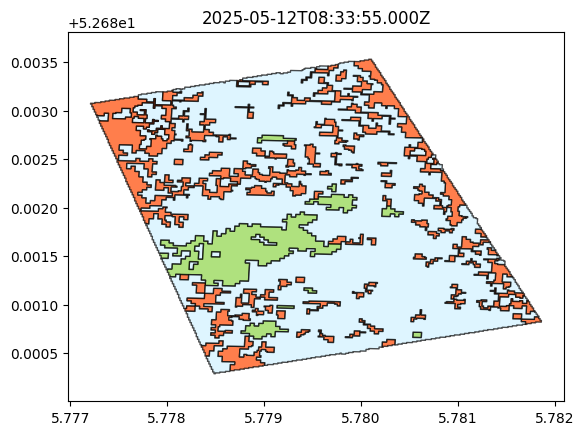

EPSG:4326


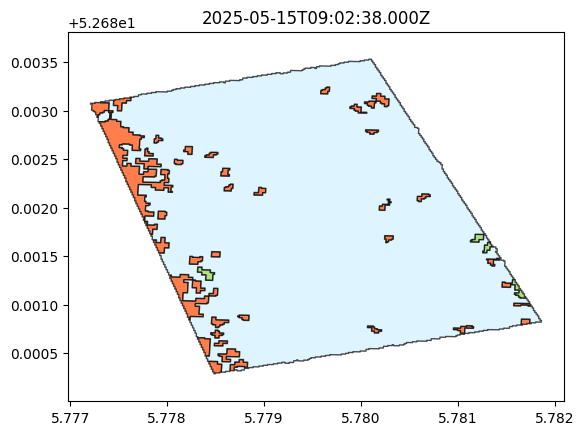

EPSG:4326


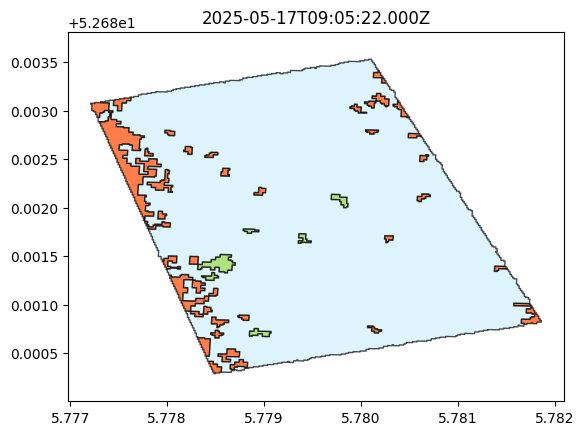

EPSG:4326


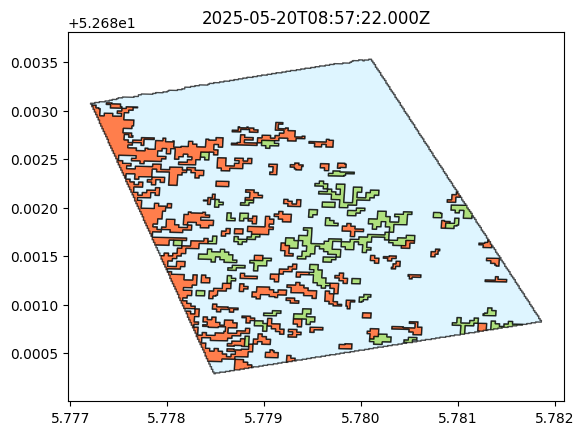

EPSG:4326


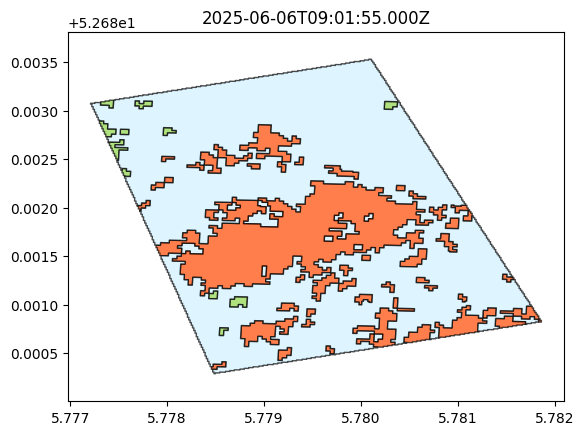

EPSG:4326


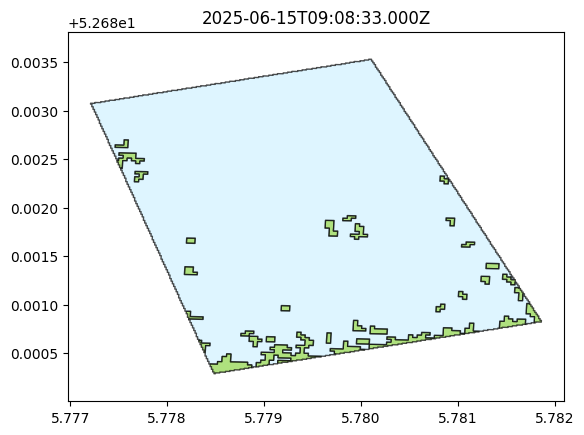

EPSG:4326


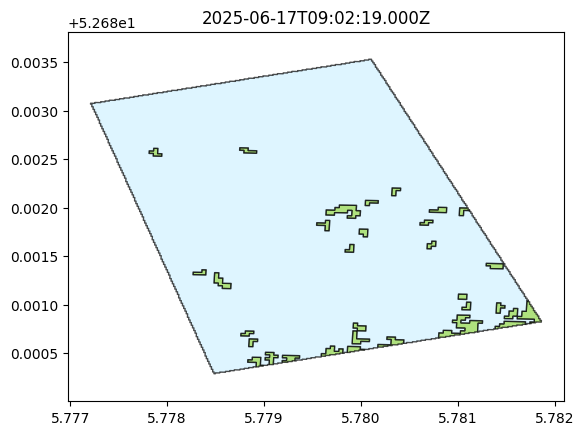

EPSG:4326


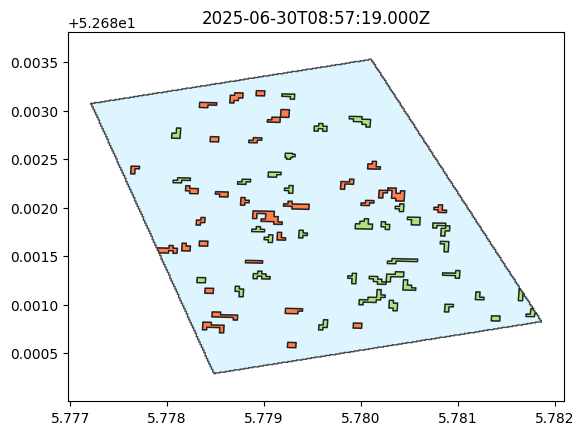

EPSG:4326


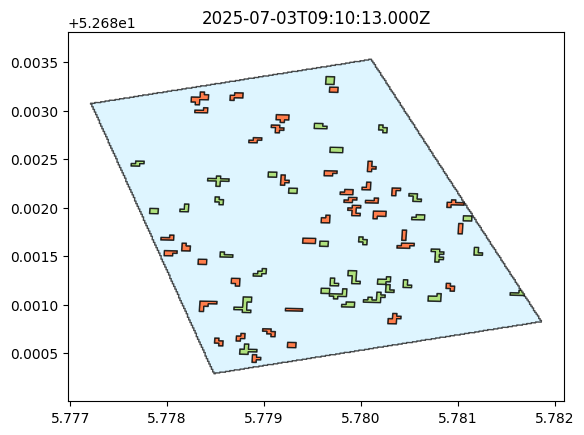

EPSG:4326


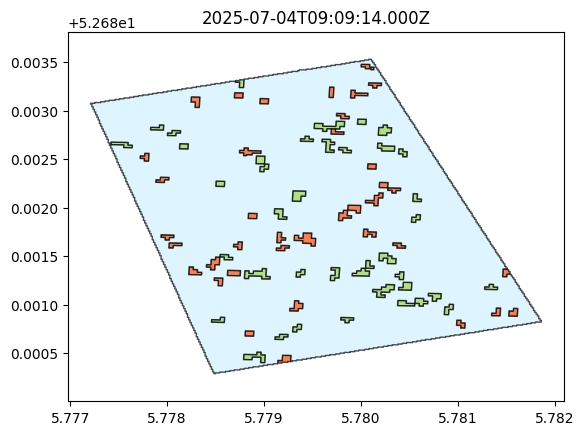

EPSG:4326


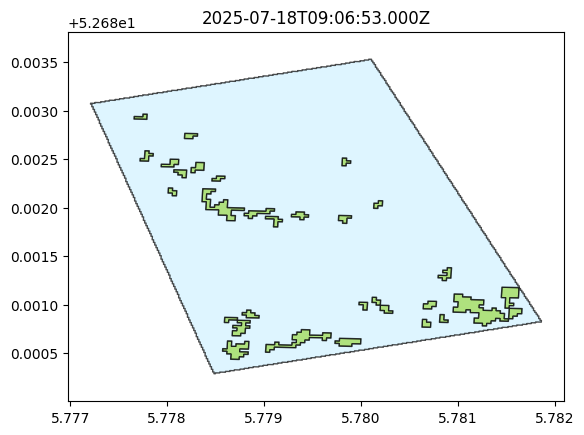

EPSG:4326


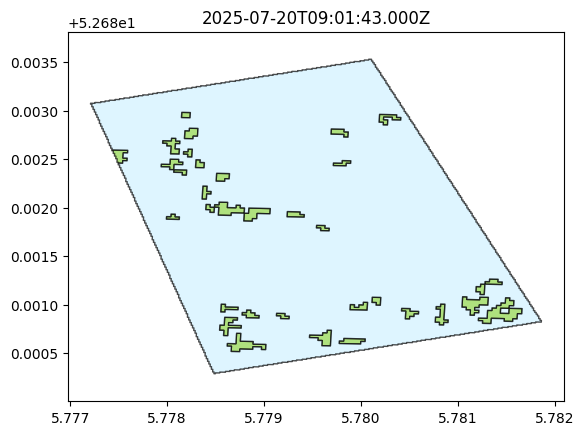

EPSG:4326


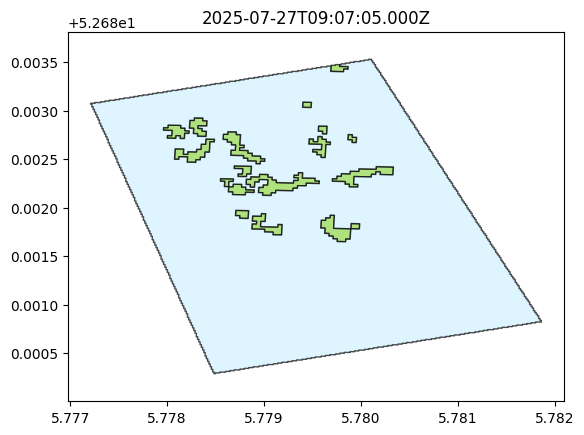

EPSG:4326


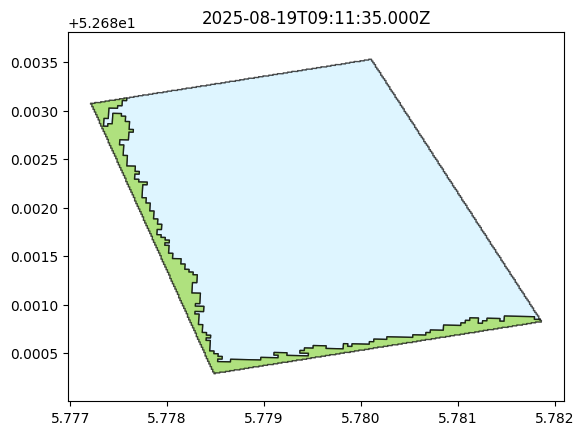

EPSG:32631


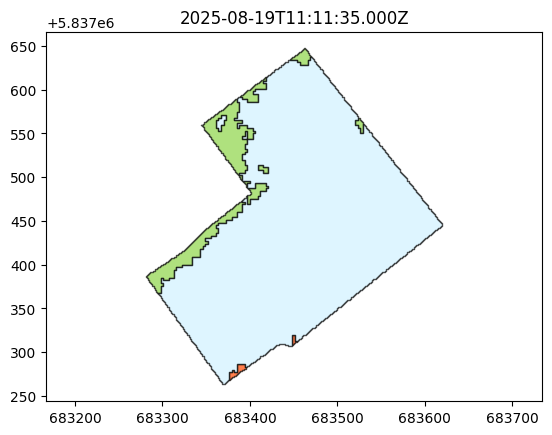

EPSG:4326


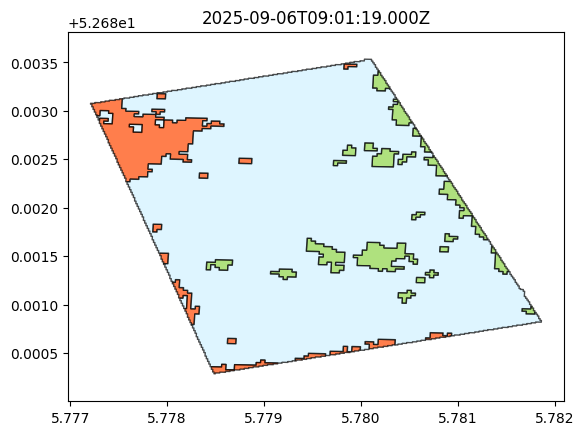

EPSG:4326


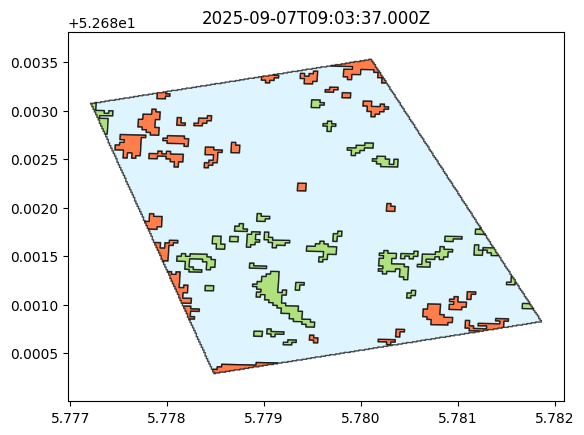

In [ ]:
dn_colors = {1: "#D1F2FF", 2: "#FF4700", 3: "#8ED547"}
for idx, row in df_layers.iterrows():
    geojson_url = row["path"]
    try:
        # Read GeoJSON
        gdf = gpd.read_file(geojson_url)
        
        # Optional: color by DN if the property exists
        if "DN" in gdf.columns:
            gdf["plot_color"] = gdf["DN"].map(dn_colors)
        else:
            gdf["plot_color"] = "#AAAAAA"  # fallback gray

        # Plot
        gdf.plot(color=gdf["plot_color"], edgecolor="black", alpha=0.7)

        plt.title(str(row.get("acquired_at", f"Layer {idx}")))
        plt.axis("equal")  # maintain aspect ratio
        plt.show()

    except Exception as e:
        print(f"⚠️ Failed to plot {geojson_url}: {e}")